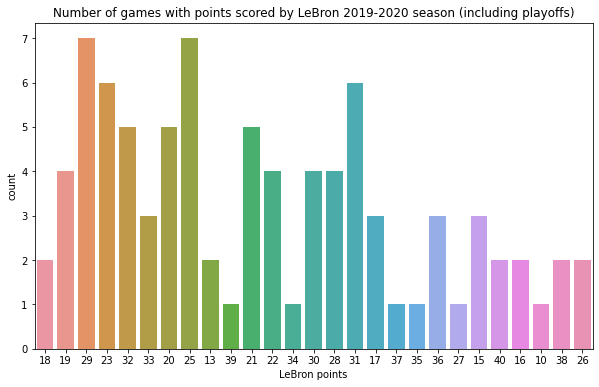

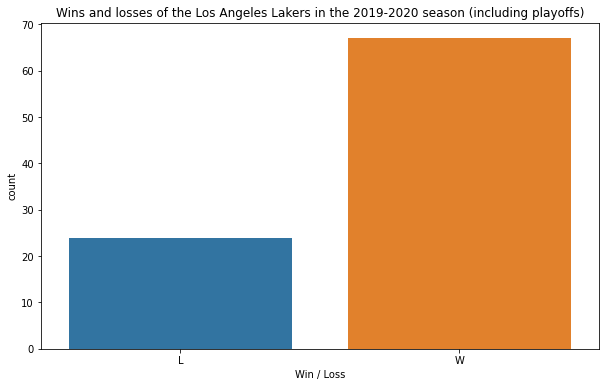

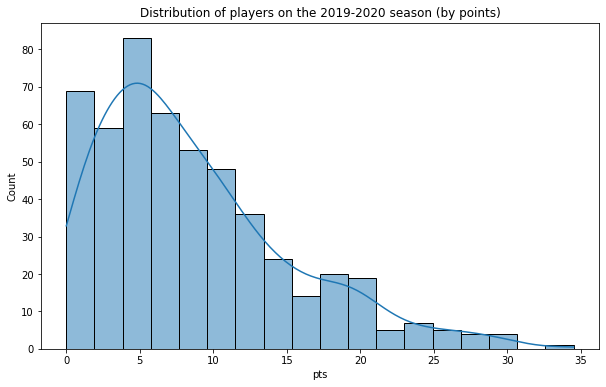

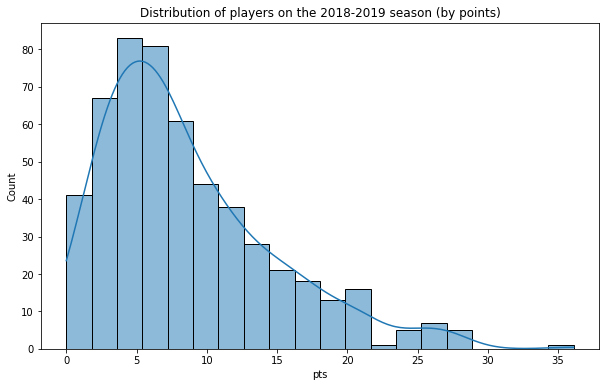

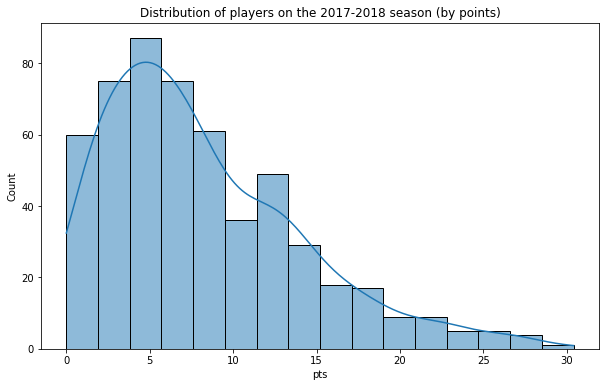

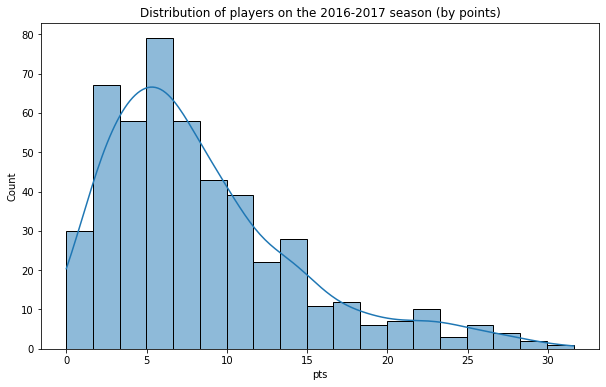

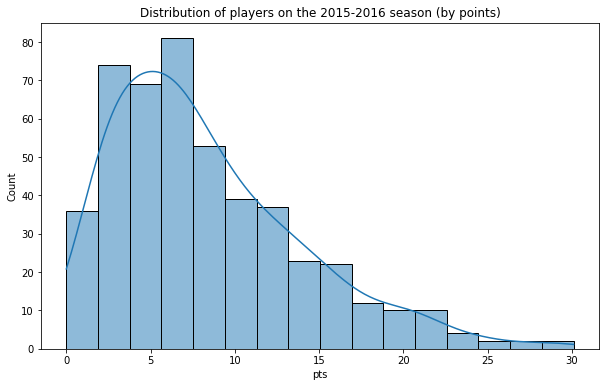

<ipython-input-1-e064d404ddb9>:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curry['year'] = df_curry['season'].apply(fu.get_year)
<ipython-input-1-e064d404ddb9>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_westbrook['year'] = df_westbrook['season'].apply(fu.get_year)
<ipython-input-1-e064d404ddb9>:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

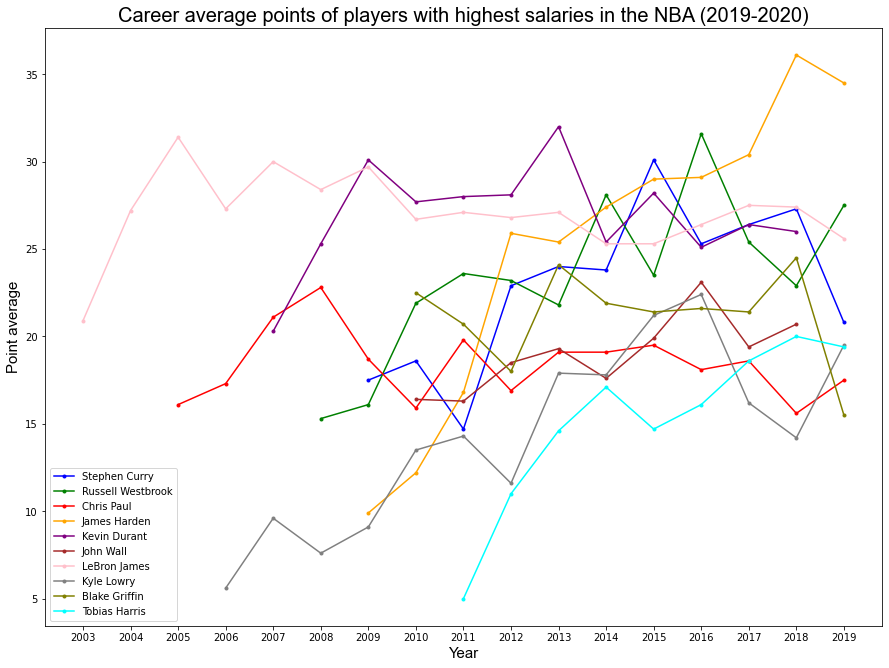

<Figure size 432x288 with 0 Axes>

In [1]:
import requests 
import pandas as pd
import json
import os
from pandas import json_normalize
from bs4 import BeautifulSoup
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import src.functions as fu


response = fu.balldontlie_request("https://www.balldontlie.io/api/v1/teams?page=1") # This makes a request to the API. 
# The result is a json file with information about NBA teams.

dict_teams = fu.get_id(response) # This stores the ids and the names of the teams as a dictionary in the variable.

response2 = fu.balldontlie_request("https://www.balldontlie.io/api/v1/games?per_page=100&seasons[]=2019&team_ids[]=14") 
# This variable stores the result of the request to the API. 

response2 = response2['data'] # This variable saves the information inside the 'data' of the response of the request to the API.

df_lakers_games = fu.lakers_df(response2)

fu.append_missing(df_lakers_games)

# This csv will be used to add info to the dataframe. 
data_br = pd.read_csv("data/basketball_reference_lakers.csv",encoding = "ISO-8859-1") 

# This creates a new dataframe droping the unnecesary columns. 
df_br = data_br.drop(["ï»¿G", "Start (ET)", "Unnamed: 3", "Unnamed: 4", "Unnamed: 5", "Unnamed: 8", "Notes"], axis = 1)

df_lakers_games['Date'] = df_lakers_games['Date'].apply(fu.clean_date, "T") # This applies a function to the 'date' column to get only the 
# part before the T.

df_lakers_games = df_lakers_games.sort_values(by = ['Date']) # This sorts the games by date. 

df_w_l = df_br['Unnamed: 7'] # This saves the column 'Unnamed:7', which has the losses and wins as l and s.
df_lakers_games = df_lakers_games.join(df_w_l) # This adds the column to the dataframe created with the info of the API. 
df_lakers_games.rename(columns = {'Unnamed: 7': 'Win / Loss'}, inplace = True) # This renames the column. 

df_lebron_full = pd.read_csv("data/lebron.csv",encoding = "ISO-8859-1") # This csv file includes the points scored by LeBron
# James each year. 

df_lakers_games.to_csv('./data/lakers.csv') # This exports the definitive dataframe to a csv file. 

df_lebron = df_lebron_full['PTS'] # This stores the column with the points into a variable. 
df_lakers_games = df_lakers_games.join(df_lebron) # This adds the column to the dataframe. 
df_lakers_games.rename(columns = {'PTS': 'LeBron points'}, inplace = True) # This gives the column a new name. 
df_lakers_games['LeBron points'].replace(['Inactive'], np.nan, inplace = True) # As there are games he didn't play, those values are
# stored ad 'Inactive'. This converts all the 'Inactive' into NaN values. 

# This graph shows the number of games in which LeBron scored certain amount of points. 
fig, ax = plt.subplots(figsize = (10, 6))
lebron_points = sns.countplot(x = df_lakers_games['LeBron points']) 
ax.set_title("Number of games with points scored by LeBron 2019-2020 season (including playoffs)")
plt.show()

fu.save_graph(lebron_points, "images/lebron_points.svg") # This exports the graph to a svg file. 

# This graph shows the wins and losses of the Los Angeles lakers in the 2019-2020 season. 
fig, ax = plt.subplots(figsize = (10, 6))
df_lakers_w_l = sns.countplot(x = df_lakers_games['Win / Loss']) 
ax.set_title("Wins and losses of the Los Angeles Lakers in the 2019-2020 season (including playoffs)")
plt.show()

# fu.download_dataset() # This downloads the dataset. 

data = pd.read_csv("data/dataset.csv",encoding = "ISO-8859-1") # This opens the main dataset with the stats of the players.

df = data.copy() # This makes a copy of the datasate, to make changes. 

df = df.drop(["Unnamed: 0"], axis = 1) # This drops a column called 'Unnamed: 0' that didn't have any useful info. 

df_subset = df[['player_name', 'pts', 'reb', 'ast', 'net_rating', 'season']] # This makes a subset with some columns of the df. 

df_2019 = df_subset[df_subset['season'] == '2019-20'] # This filters the information for the 2019-2020 season. 

# This graph shows the distribution of playes by points in the 2019-2020 season. 
fig, ax = plt.subplots(figsize = (10, 6))
distribution_2019 = sns.histplot(x = df_2019['pts'], kde = True)
ax.set_title("Distribution of players on the 2019-2020 season (by points)")
plt.show()

fu.save_graph(distribution_2019, "images/lakers_w_l.svg") # This exports the graph to a svg file.

# I repeat the same operation with previous four seasons.

df_2018 = df_subset[df_subset['season'] == '2018-19']

fig, ax = plt.subplots(figsize = (10, 6))
distribution_2018 = sns.histplot(x = df_2018['pts'], kde = True)
ax.set_title("Distribution of players on the 2018-2019 season (by points)")
plt.show()

fu.save_graph(distribution_2018, "images/distribution_2018.svg")

df_2017 = df_subset[df_subset['season'] == '2017-18']

fig, ax = plt.subplots(figsize = (10, 6))
distribution_2017 = sns.histplot(x = df_2017['pts'], kde = True)
ax.set_title("Distribution of players on the 2017-2018 season (by points)")
plt.show()

fu.save_graph(distribution_2017, "images/distribution_2017.svg")

df_2016 = df_subset[df_subset['season'] == '2016-17']

fig, ax = plt.subplots(figsize = (10, 6))
distribution_2016 = sns.histplot(x = df_2016['pts'], kde = True)
ax.set_title("Distribution of players on the 2016-2017 season (by points)")
plt.show()

fu.save_graph(distribution_2016, "images/distribution_2016.svg")

df_2015 = df_subset[df_subset['season'] == '2015-16']

fig, ax = plt.subplots(figsize = (10, 6))
distribution_2015 = sns.histplot(x = df_2015['pts'], kde = True)
ax.set_title("Distribution of players on the 2015-2016 season (by points)")
plt.show()


# Finally, I created a dataset for each of the ten players with the highest salary, in order to plot their average points 
# in their career. 

df_curry = df_subset[df_subset['player_name'] == 'Stephen Curry'] 
df_curry['year'] = df_curry['season'].apply(fu.get_year)

df_westbrook = df_subset[df_subset['player_name'] == 'Russell Westbrook'] 
df_westbrook['year'] = df_westbrook['season'].apply(fu.get_year)

df_paul = df_subset[df_subset['player_name'] == 'Chris Paul'] 
df_paul['year'] = df_paul['season'].apply(fu.get_year)

df_harden = df_subset[df_subset['player_name'] == 'James Harden'] 
df_harden['year'] = df_harden['season'].apply(fu.get_year)

df_durant = df_subset[df_subset['player_name'] == 'Kevin Durant'] 
df_durant['year'] = df_durant['season'].apply(fu.get_year)

df_wall = df_subset[df_subset['player_name'] == 'John Wall'] 
df_wall['year'] = df_wall['season'].apply(fu.get_year)

df_james = df_subset[df_subset['player_name'] == 'LeBron James'] 
df_james['year'] = df_james['season'].apply(fu.get_year)

df_lowry = df_subset[df_subset['player_name'] == 'Kyle Lowry'] 
df_lowry['year'] = df_lowry['season'].apply(fu.get_year)

df_griffin = df_subset[df_subset['player_name'] == 'Blake Griffin'] 
df_griffin['year'] = df_griffin['season'].apply(fu.get_year)

df_harris = df_subset[df_subset['player_name'] == 'Tobias Harris'] 
df_harris['year'] = df_harris['season'].apply(fu.get_year)


plt.figure(figsize=(15,11))

plt.title('Career average points of players with highest salaries in the NBA (2019-2020)', fontdict={'fontname':'arial', 'fontsize':20})

plt.plot(df_curry['year'], df_curry['pts'], linestyle = 'solid', marker = '.', color = 'blue')
plt.plot(df_westbrook['year'], df_westbrook['pts'], linestyle = 'solid', marker = ".", color = 'green')
plt.plot(df_paul['year'], df_paul['pts'], linestyle = 'solid', marker = ".", color = 'red') 
plt.plot(df_harden['year'], df_harden['pts'], linestyle = 'solid', marker = ".", color = 'orange')
plt.plot(df_durant['year'], df_durant['pts'], linestyle = 'solid', marker = ".", color = 'purple')
plt.plot(df_wall['year'], df_wall['pts'], linestyle = 'solid', marker = ".", color = 'brown') 
plt.plot(df_james['year'], df_james['pts'], linestyle = 'solid', marker = ".", color = 'pink')
plt.plot(df_lowry['year'], df_lowry['pts'], linestyle = 'solid', marker = ".", color = 'gray')
plt.plot(df_griffin['year'], df_griffin['pts'], linestyle = 'solid', marker = ".", color = 'olive')
plt.plot(df_harris['year'], df_harris['pts'], linestyle = 'solid', marker = ".", color = 'cyan')

plt.xticks(df_james['year'][::1])


plt.xlabel('Year', fontdict={'fontname':'arial', 'fontsize':15})
plt.ylabel('Point average', fontdict={'fontname':'arial', 'fontsize':15})

plt.legend(['Stephen Curry', 'Russell Westbrook', 'Chris Paul', 'James Harden', 'Kevin Durant', 
            'John Wall', 'LeBron James', 'Kyle Lowry', 'Blake Griffin', 'Tobias Harris'])

plt.show() 

plt.savefig('avg_points.png')